# FP98: SQUIDs

Juan Carlos Provencio Lameiras 

Mike Brandt

31. Oct - 4. Nov 2022

## General

In [21]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log, pi
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy import odr
from scipy.integrate import quad
from scipy.signal import find_peaks
from scipy.signal import argrelextrema, argrelmin, argrelmax
from scipy.special import erfc
from sympy.solvers import solve
from sympy import Symbol
import pandas as pd
import matplotlib.transforms as mtransforms


def fehler(name, G, sig_G, G_lit, sig_G_lit):
    print(name)
    print('Relative error: ', sig_G / G * 100)
    print('Rel. error (comparison):', sig_G_lit / G_lit * 100)
    print('Absolute error: ', G - G_lit)
#    print('Verhältnis:', G / G_lit)
    print('Sigma-deviation: ', np.abs(G - G_lit) / sqrt(sig_G ** 2 
                                                         + sig_G_lit ** 2),'\n')
    
    
def fehler_small(name, G, sig_G):
    print(name)
    print('Relativer Fehler: ', sig_G / G * 100)
    

def ergebnis(name, G, sig_G, komma, einheit):
    print(name + ' =', np.round(G, komma), '+/-', np.round(sig_G, komma), einheit)
    

def fitparameter(name, G, sig_G, komma, einheit):
    return name + ' =' + str(np.round(G, komma)) + '$\pm$' + str(np.round(sig_G, komma)) + einheit

def chi_sq(test_func, x_val, y_val, sig_y_val, popt, number):
    chi2_ = np.sum((test_func(x_val, *popt) - y_val) ** 2 
                   / sig_y_val ** 2)
    dof = len(y_val) - number
    chi2_red = chi2_ / dof

    print("chi2 =", chi2_)
    print("chi2_red =",chi2_red)

    prob = np.round(1 - chi2.cdf(chi2_,dof), 2) * 100 
    print("Probability =", prob, "%\n")


## 5.2 Single Stage SQUID

A single SQUID was analyzed using both AMP and FLL mode

### 5.2.1 Open Loop


<a id='5.2.1_Resistance'></a>

#### Resistance
We're interested in measuring the resistance of the normal conducting SQUID, i.e. above the critical temperature for the superconducting properties. For that we plot the characteristic current-voltage line. Several measurements for the voltage and corresponding current values were measured.

For this measurement, the value was measured with the oscilloscope by observing one single time value at different current values. For this reason there is a small human error regarding the point at which the value could be measured. Generously we could assume an error of up to 5 mV, accounting also for fluctuations of the voltage.

According to Ohm's Law, the voltage is given by 

$$R = \frac{V}{I}.$$

We use this equation on the linear range of the current-voltage characteristic to determine the resistance in the SQUID. For this we'll go to the 

<a id='5.2.1_integer_half'></a>

#### Integer and half-integer current-voltage characteristic
Up next we saved the current-voltage characteristic for integer and half-integer $\Phi_0$. The integer graph can be recognized due to its wider plateau. 

In [22]:
# Function to read files
def stripper(data):
    x = np.loadtxt('txt_data/' + data, skiprows = 3)
    
    return x

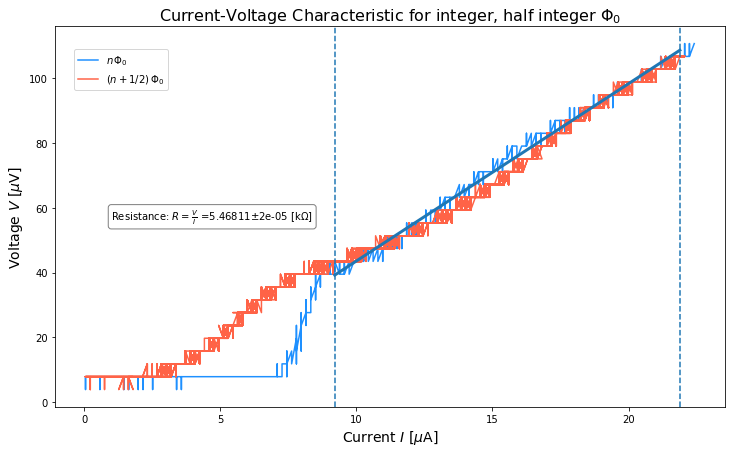

In [23]:
# Measurements 
x_521_a = stripper('5.2.1_Phib_30_20221031-0002_1.txt') # n
x_521_b = stripper('5.2.1_Phib_15_20221031-0002_1.txt') # n + 1/2

sort = np.argsort(x_521_a[:, 1])
x_521_a[:, 1] = x_521_a[:, 1][sort]
x_521_a[:, 2] = x_521_a[:, 2][sort]



a = 1
c = 0.5

I_U = 45e-3 # mA, peak to peak current at the generator
U_I_a = np.max(x_521_a[:, 1]) - np.min(x_521_a[:, 1]) # V, peak to peak voltage
U_I_b = np.max(x_521_b[:, 1]) - np.min(x_521_b[:, 1]) # V, peak to peak voltage

R_a = I_U / U_I_a
R_b = I_U / U_I_b


x_521_a[:, a] = (x_521_a[:, a] + c) / R_a
x_521_b[:, a] = (x_521_b[:, a] + c) / R_b

x_521_a[:, 2] = x_521_a[:, 2] / 2000 * 1e6 # muV, divided by amplification
x_521_b[:, 2] = x_521_b[:, 2] / 2000 * 1e6

# Linear fit
one = 10000
two = 24000
popt_521_a, pcov_521_a = curve_fit(line, x_521_a[one:two, 1], x_521_a[one:two, 2])

R_521 = popt_521_a[0]
err_R_521 = pcov_521_a[0, 0]

fig, ax1 = plt.subplots(figsize = (12, 7))
ax1.set_title('Current-Voltage Characteristic for integer, half integer $\Phi_0$', size = 16)

ax1.plot(x_521_a[:, 1], x_521_a[:,2], color = 'dodgerblue', label = '$n\, \Phi_0$', )
ax1.plot(x_521_b[:, 1], x_521_b[:,2], color = 'tomato', label = '$(n + 1/2)\, \Phi_0$') 

ax1.plot(x_521_a[one:two, 1], line(x_521_a[one:two, 1], *popt_521_a),
        linewidth = 3)
ax1.axvline(x_521_a[one, 1], ls = '--')
ax1.axvline(x_521_a[two, 1], ls = '--')

ax1.set_xlabel('Current $I$ [$\mu$A]', size = 14)
ax1.set_ylabel('Voltage $V$ [$\mu$V]', size = 14)

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
textstr = fitparameter('Resistance: $R = \\frac{V}{I}$', R_521, err_R_521, 5, ' [k$\\Omega$]')
                       
ax1.text(1, 60, textstr, fontsize=10,
        verticalalignment='top', bbox=props)


fig.legend(loc = (0.1, 0.8))

plt.savefig('diagramms/5.2.1_integer_half_integer.png')

In [24]:
ergebnis('R', R_521, err_R_521, 5, ' [Ohm]')

R = 5.46811 +/- 2e-05  [Ohm]


<a id='5.2.1_flux_voltage'></a>

#### Flux-voltage characteristic

##### B:

We also measure the flux-voltage characteristic by applying a generator signal on $\Phi_B$ and $\Phi_X$. The peak-to-peak voltage at the bias current $I_b = 14.1 \mu$A is estimated around $U_{PP}^b = 58(1)$ mV. However, in AMP mode the output voltage is amplified by a factor of 2000, so our real peak-to-peak voltage is

$$ U^b_{PP} = \dfrac{58(1)}{2000}\, \text{mV} = 29.0(5)\, \mu\text{V}. $$

We apply a generator signal at $\Phi_B$ of $I_{\Phi B} = 100 \mu$A, and at $\Phi_X$ of $I_{\Phi X} = 20 \mu$A.

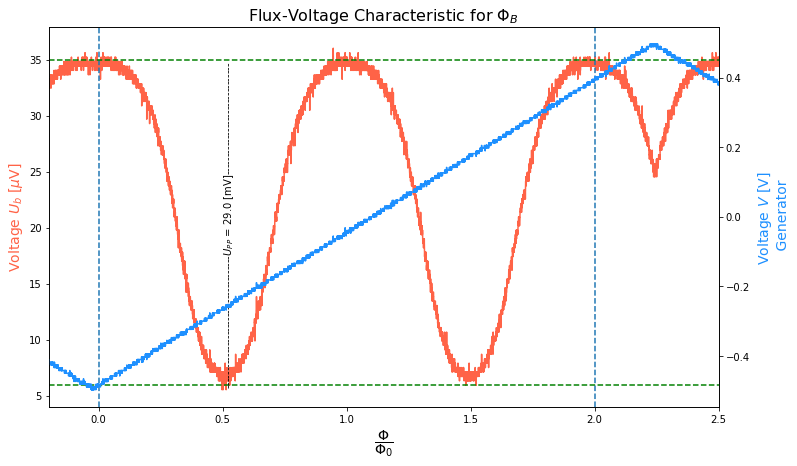

In [25]:
# Measurements 
x_521_B = stripper('5.2.1_Flux_Char_B_20221102-0003_1.txt') # n
x_521_X = stripper('5.2.1_Flux_Char_X_20221102-0002_1.txt') # n + 1/2

x_521_B[:, 2] = x_521_B[:, 2] / 2000 * 1e3 # muV, divided by amplification

time1_B = 6000
time2_B = 15300

a = 0

phi_B = x_521_B[:, a] / (x_521_B[time2_B, a] - x_521_B[time1_B, a]) * 2
phi_B = phi_B + 1.07
d = phi_B

# Plot for Flux voltage characteristic B

fig,ax = plt.subplots(figsize = (12, 7)) 
plt.title('Flux-Voltage Characteristic for $\Phi_B$', size = 16)

ax.plot(d, x_521_B[:,2], color = 'tomato')
ax.set_xlabel('$\dfrac{\Phi}{\Phi_0}$', size = 14)
ax.set_ylabel('Voltage $U_b$ [$\mu$V]', size = 14, color = 'tomato')
ax.axvline(d[time1_B], ls = '--')
ax.axvline(d[time2_B], ls = '--')
# PP-Voltage
ax.axhline(12 / 2000 * 1e3, ls = '--', color = 'green')
ax.axhline(70 / 2000 * 1e3, ls = '--', color = 'green')
ax.text(0.5, 68 / 2000 * 1e3, '-------------------------------------$U_{PP}$ = ' 
         + str(np.round(70 / 2000 * 1e3 - 12 / 2000 * 1e3, 3)) 
        + ' [mV]-------------------------------', rotation = 90)
plt.xlim(-0.2, 2.5)

ax2 = ax.twinx()
ax2.plot(d, x_521_B[:,1], color = 'dodgerblue')
ax2.set_ylabel('Voltage $V$ [V] \n Generator', color = 'dodgerblue', size = 14)

plt.savefig('diagramms/5.2.1_Phi_BV_Char.png')

We can appreciate, that $\Delta \Phi = 2 \Phi_0$.

##### X:

The measured peak to peak voltage, accounting for the amplification is

$$ U^X_{PP} = 29(5)\, \mu\text{V} $$

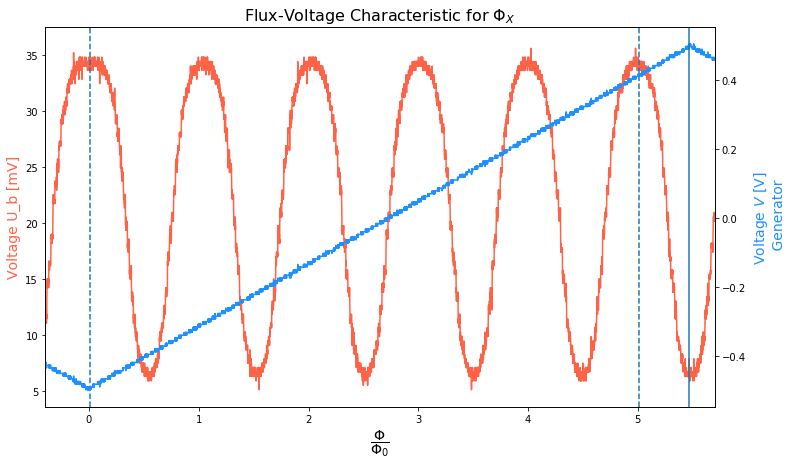

In [26]:
fig,ax = plt.subplots(figsize = (12, 7))
plt.title('Flux-Voltage Characteristic for $\Phi_X$', size = 16)

time1_X = 5900
time2_X = 15500

x_521_X[:, 2] = x_521_X[:, 2] / 2000 * 1e3 # muV, divided by amplification

phi_X = 5 * x_521_X[:, 0] / (x_521_X[time2_X, 0] - x_521_X[time1_X, 0]) 
phi_X = phi_X + 2.65

c = phi_X

ax.plot(c, x_521_X[:,2], color = 'tomato')
ax.set_xlabel('$\dfrac{\Phi}{\Phi_0}$', size = 14)
ax.set_ylabel('Voltage U_b [mV]', size = 14, color = 'tomato')
# PP-Voltage
#ax.axhline(12 / 2000 * 1e3, ls = '--', color = 'green')
#ax.axhline(70 / 2000 * 1e3, ls = '--', color = 'green')
#ax.text(0, 68 / 2000 * 1e3, '--------------------------------------$U_{PP}$ = ' 
 #        + str(np.round(70 / 2000 * 1e3 - 12 / 2000 * 1e3, 3)) 
  #      + ' [mV]-------------------------------', rotation = 90)
ax.axvline(c[time1_X], ls = '--')
ax.axvline(c[time2_X], ls = '--')

plt.xlim(-0.4, 5.7)

ax2 = ax.twinx()
ax2.plot(c, x_521_X[:,1], color = 'dodgerblue')
ax2.set_ylabel('Voltage $V$ [V] \n Generator', color = 'dodgerblue', size = 14)

plt.axvline(c[np.argmax(x_521_X[:, 1])])


plt.savefig('diagramms/5.2.1_Phi_XV_Char.png')

In this case, we can see there are 5 fluxquanta in the cycle.

##### Mutual inductances:

We can calculate the mutual inductances $M_{\text{IN}}^{-1}$ and $M_{\Phi\text{B}}^{-1}$ with (47) in the script:

$$ M^{-1} = \dfrac{I_\Phi}{\Delta \Phi} $$

In [27]:
# Mutual inductance for X

delta_Phi_X = 5.0 # Phi_0
err_Phi_X = 0.1
tplus_X = np.argmax(x_521_X[:, 1])
tminus_X = np.argmin(x_521_X[:, 1])
t_max_X = x_521_X[tplus_X, 0] - x_521_X[tminus_X, 0]

I_Phi_X = 50 * (x_521_X[time2_X, 0] - x_521_X[time1_X, 0]) / t_max_X
# 20 *: generator signal, time_2-1 / t_max: Anteil an Strom was wir betrachten

M_Phi_X_inv = (delta_Phi_X / I_Phi_X) ** -1
err_M_Phi_X_inv = I_Phi_X * (err_Phi_X) / (delta_Phi_X ** 2)

#ergebnis('Mutual inductance: M_Phi_X_inv', M_Phi_X_inv, err_M_Phi_X_inv, 1, 
 #        ' [microA Phi_0^-1]')

# Mutual inductance for B
delta_Phi_B = 2.0 # Phi_0
err_Phi_B = 0.1
tplus_B = np.argmax(x_521_B[:, 1])
tminus_B = np.argmin(x_521_B[:, 1])
t_max_B = x_521_B[tplus_B, 0] - x_521_X[tminus_B, 0]

I_Phi_B = 100 * (x_521_B[time2_B, 0] - x_521_X[time1_B, 0]) / t_max_B # muA
err_I_Phi_B = 0


M_Phi_B_inv = (delta_Phi_B / I_Phi_B) ** -1
err_M_Phi_B_inv = I_Phi_B * (err_Phi_B) / (delta_Phi_B ** 2)

#ergebnis('Mutual inductance: M_Phi_B_inv', M_Phi_B_inv, err_M_Phi_B_inv, 0, 
 #        '  [microA Phi_0^-1]')

<a id='5.2.1_flux_voltage_results'></a>

The Difference $\Delta \Phi$ is given by amounts of Fluxquanta (periods) in a cycle. To determine the errors we have to account for a) the "read" error of the fluxquanta, i.e. if we counted into the total a peak that didn't belong to the cycle. We count with a read error of $\pm 0.1$, although the values would in theory be discrete in natural numbers. Small fluctuations however are accounted for within this error. The generator signal had relative to the "counts" a very high accuracy, so that its input into the error is negligible.

For $M^{-1}_{\Phi\text{B}}$ with

In [28]:
ergebnis('Phi_B', delta_Phi_B, err_Phi_B, 1, 'Phi_0')

Phi_B = 2.0 +/- 0.1 Phi_0


with an error of 

$$ \Delta M^{-1}_{\Phi\text{B}} = I_{\Phi_B} \cdot \dfrac{\Delta \Phi_B}{\Phi_B^2}$$ 

In [29]:
print('err_M_Phi_B_inv = ' + str(np.round(err_M_Phi_B_inv, 0)) + ' muA Phi_0^-1')

err_M_Phi_B_inv = 2.0 muA Phi_0^-1


we get

<a id='M_Phi_B_inv'></a>

In [30]:
ergebnis('M_Phi_B_inv', M_Phi_B_inv, err_M_Phi_B_inv, 0, 'muA Phi_0^-1')

M_Phi_B_inv = 44.0 +/- 2.0 muA Phi_0^-1


For $M^{-1}_{\text{IN}}$ with 

In [31]:
ergebnis('Phi_X', delta_Phi_X, err_Phi_X, 1, 'Phi_0')

Phi_X = 5.0 +/- 0.1 Phi_0


we get

<a id='M_Phi_X_inv'></a>

In [32]:
ergebnis('M_Phi_X_inv', M_Phi_X_inv, err_M_Phi_X_inv, 1, 'muA Phi_0^-1')

M_Phi_X_inv = 9.1 +/- 0.2 muA Phi_0^-1


<a id='5.2.2_FLL'></a>

### 5.2.2 Flux Locked Loop


We linearise the signal and plot it with python. From the slope of this graph we can measure the amplification with the slope of this graph.

<a id='5.2.2_linearised_signal'></a>

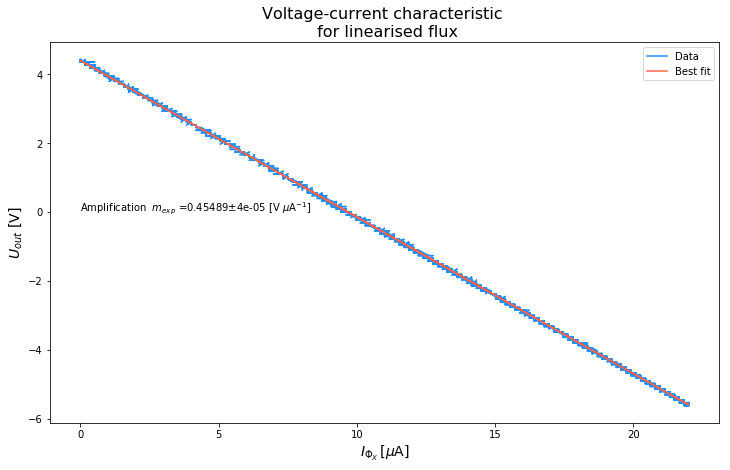

In [33]:
##### Alternative 2, didn't work
x_522_amp = stripper('5.2.2_Linearisiert_100kOhm_20221104-0009_1.txt')
x_522_amp[:, 1] = x_522_amp[:, 1] + np.max(x_522_amp[:, 1])

a = 1 # Meaning the 0, 1, 2 column of the data

U_I = np.max(x_522_amp[:,a]) - np.min(x_522_amp[:,a])
I_U = 45e-3 # Peak to peak current
R = I_U / U_I

x_522_amp[:,2] = x_522_amp[:,2] 
x_522_amp[:,a] = x_522_amp[:,a] / R # I = V/R

# Plot
plt.figure(figsize = (12, 7))

plt.plot((x_522_amp[:,a]), x_522_amp[:,2], label = "Data",
        color = 'dodgerblue')
plt.xlabel('$I_{\Phi_X}\, [\mu$A]', size = 14)
plt.ylabel('$U_{out}$ [V]', size = 14)
plt.title('Voltage-current characteristic \n for linearised flux', size = 16)


popt_522_amp, pcov_522_amp = curve_fit(line, x_522_amp[:,a], x_522_amp[:,2])
m_exp = -popt_522_amp[0]
err_m_exp = sqrt(pcov_522_amp[0, 0])


plt.plot((x_522_amp[:,a]), line(x_522_amp[:,a], *popt_522_amp), 
         label = 'Best fit', color = 'tomato')
plt.text(0, 0, fitparameter('Amplification  $m_{exp}$', m_exp, err_m_exp, 5, ' [V $\mu$A$^{-1}$]'))

plt.legend(loc = 'best')


plt.savefig('diagramms/5.2.2_IV_Char_linearised.png')

This gives us an amplification factor of

In [34]:
ergebnis('m_exp', m_exp, err_m_exp, 5, 'V microA^-1')

m_exp = 0.45489 +/- 4e-05 V microA^-1


In [35]:
# Theoretical amplification based on the values for the mutual inductances
R_F = 100 # kOhm
err_m_theo = R_F * sqrt( (err_M_Phi_B_inv / M_Phi_X_inv) ** 2 
                   + (M_Phi_B_inv * err_M_Phi_X_inv / (M_Phi_B_inv) ** 2) ** 2 ) * 1e-3
m_theo = R_F * M_Phi_B_inv / M_Phi_X_inv * 1e-3

The amplification factor can be obtained by the equation 

$$ \Delta U_{out} = - R_F \dfrac{M_{\text{IN}}}{M_{\Phi\text{B}}} \Delta I_{\text{IN}} $$ 

where $M_\text{IN}^{-1} = M_{\Phi X}^{-1}$, with amplification factor

$$ m = R_F \dfrac{M_{\text{IN}}}{M_{\Phi \text{B}}}. $$

For this measurement we count with an error within the resistance of $\pm 1\%$, $R_F = 100(1)\, \text{k}\Omega$. Relative to the errors of the mutual inductances this is negligible. The error is given by

$$ \Delta m = R_F \sqrt{(\dfrac{\Delta M_{{\text{IN}}^{-1}}}{M_{\Phi\text{B}}^{-1}})^2 + ( \dfrac{\Delta M_{\text{IN}}^{-1} M_{\Phi\text{B}}}{(M_{\text{IN}^{-1}})^2})^2 } $$ 


Using the value from the previous exercise for [$M^{-1}_{\text{IN}}$](#M_Phi_X_inv) and [$M^{-1}_{\Phi B}$](#M_Phi_B_inv) we get

In [36]:
ergebnis('Theoretical amplification: m_theo', m_theo, err_m_theo, 3, '[V microA^-1]')

Theoretical amplification: m_theo = 0.488 +/- 0.024 [V microA^-1]


The deviation between the two values is

In [37]:
fehler('Amplification: experimental and theoretical (comparison)', m_exp, err_m_exp, m_theo, err_m_theo)

Amplification: experimental and theoretical (comparison)
Relative error:  0.009666750114442261
Rel. error (comparison): 5.000707248314009
Absolute error:  -0.032767988413266724
Sigma-deviation:  1.3437030579000073 



ergebnis('Theoretical amplification: m_theo', m_theo, err_m_theo, 3, '[V microA^-1]')The deviation between both values lies beneath the 3 sigma range, so it is for the purposes of this experiment still acceptable. The expectation value, with a generous error is $m_{\text{expec}} \approx 0.47(1)\, \text{V}\, \mu\text{A}^{-1}$.

In [38]:
fehler('Amplification: experimental and expectation (comparison)', m_exp, err_m_exp, 0.47, 0.01)

Amplification: experimental and expectation (comparison)
Relative error:  0.009666750114442261
Rel. error (comparison): 2.1276595744680855
Absolute error:  -0.015111127162279081
Sigma-deviation:  1.5110981068347056 



In [39]:
fehler('Amplification: theoretical and expectation (comparison)', m_theo, err_m_theo, 0.47, 0.01)

Amplification: theoretical and expectation (comparison)
Relative error:  5.000707248314009
Rel. error (comparison): 2.1276595744680855
Absolute error:  0.017656861250987643
Sigma-deviation:  0.6699117476976079 



These deviations still lie within an acceptable range from the expectations, but we must comment that the error of the expectation value was chosen quite generously, especially since the experimental error, calculated from the covariance of the fit is several orders of magnitude smaller.

<a id='5.2.3_noise_spectrum'></a>

### 5.2.3 SQUID Noise

We measured the noise spectrum in FLL mode and looked at the effect of the Gain Bandwith Product (GBP).

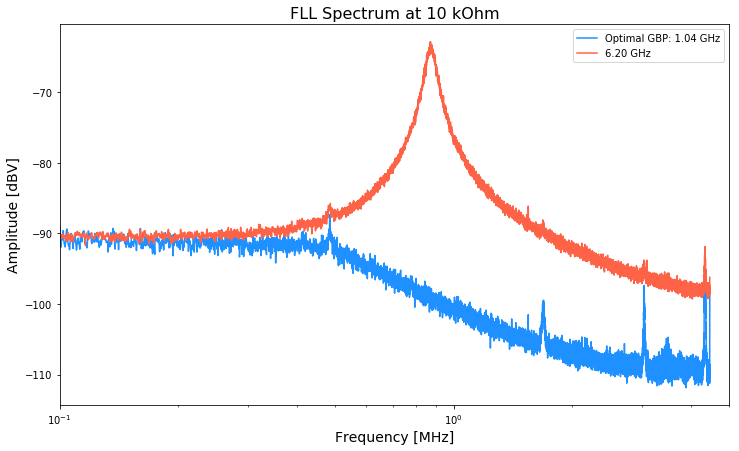

In [40]:
x_523_a = stripper('5.2.3_1.04GHz_10kOhm_20221104-0011_1.txt')
x_523_b = stripper('5.2.3_6.20GHz_10kOhm_20221104-0010_1.txt')

plt.figure(figsize = (12, 7))

plt.plot(x_523_a[:,0], x_523_a[:,2], color = 'dodgerblue', 
         label = 'Optimal GBP: 1.04 GHz')
plt.plot(x_523_b[:,0], x_523_b[:,2], color = 'tomato', 
         label = '6.20 GHz')
plt.xscale('log')
plt.xlim(1e-1, 0.5e1)
plt.title('FLL Spectrum at 10 kOhm', size = 16)
plt.xlabel('Frequency [MHz]', size = 14)
#plt.xlim(0,2)
plt.ylabel('Amplitude [dBV]', size = 14)
plt.legend(loc = 'best')


plt.savefig('diagramms/5.2.3_FLL_Spectrum_10kOhm.png')

We picked to visualize the effect two different GBPs, in the red one we can clearly see that a large GBP induces a resonance in the frequency, whereas the blue one shows a monotone descent with a steeper slope after a certain critial frequency.

<a id='5.3_two_stage'></a>

## 5.3 Two-Stage SQUID Readout

We use the highest possible GBP value without resonances and measure the noise spectrum with the lowest frequency range that includes a clear cut-off from the SQUID readout. We can determine the temperature of the SQUID by fitting the temperature and frequency dependent spectral density

$$ S(f) = \dfrac{4 k_B T}{R} \dfrac{1}{1 + \frac{f^2}{f_c^2}}. $$

In [41]:
x_53_a = stripper('5.3_2_cutoffs_20221104-0005_1.txt')

# Convert U from dBV to sqrtS_V [V / sqrt(Hz)]

Delta_f = np.abs(x_53_a[1, 0] - x_53_a[2,0])
sqrtS_V_53_a = 10 ** (x_53_a[:,2] / 20) / sqrt(Delta_f)

# Convert sqrtS_V to sqrtS_I [A / sqrt(Hz)]

Amp = m_exp # V muA^-1

sqrtS_I_53_a = sqrtS_V_53_a / Amp # muA Hz^(-1/2)
sqrtS_I_53_a = sqrtS_I_53_a * 1e-6 # A Hz^(-1/2)

We can fit a curve over the spectral density with known values for $k_B$ and $f_c$ to determine the temperature $T$ of our system. In the diagram, it is marked which interval we took into consideration in our fit. We can first eliminate $f_c$ by assuming an input coil inductance of $L = 1.4 nH$ and write $f_c$ as

$$ f_c = \dfrac{R}{2 \pi L} $$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


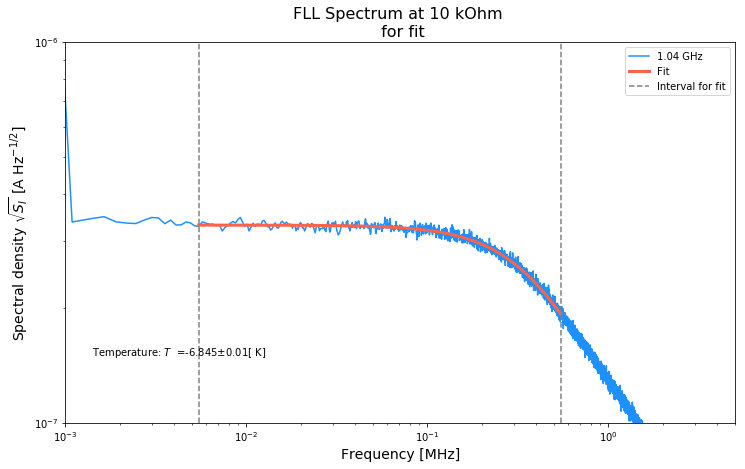

In [42]:
# Fit
def sqrt_SI(f, T, R):
    k_B = 1.380649e-23 # J K^-1
    L = 1.4e-9 # H
    f_c = R / (2 * pi * L) # 
    
    return sqrt( (4 * k_B * T) / (R) * 1 / (1 + (f ** 2) / (f_c) ** 2) )


a = 20 # lower range for fit
b = 2000 # upper range for fit

popt, pcov = curve_fit(sqrt_SI, x_53_a[a:b, 0], sqrtS_I_53_a[a:b])
popt_T = popt[0]
pcov_T = sqrt(pcov[0, 0])
popt_R = popt[1] * 1e9
pcov_R = sqrt(pcov[1, 1]) * 1e9

plt.figure(figsize = (12, 7))

plt.loglog(x_53_a[:,0], sqrtS_I_53_a, color = 'dodgerblue', 
         label = '1.04 GHz')
plt.loglog(x_53_a[a:b,0], sqrt_SI(x_53_a[a:b, 0], *popt), label = 'Fit',
          color = 'tomato', linewidth = 3)
plt.xlim(1e-3,0.5e1)
plt.ylim(1e-7, 1e-6)
plt.title('FLL Spectrum at 10 kOhm \n for fit', size = 16)
plt.xlabel('Frequency [MHz]', size = 14)
plt.axvline(x_53_a[a, 0], ls = '--', color = 'gray')
plt.axvline(x_53_a[b, 0], ls = '--', color = 'gray', label = 'Interval for fit')
plt.text(1.4e-3, 1.5e-7, fitparameter('Temperature: $T$ ', popt_T, pcov_T, 3, '[ K]'))


plt.ylabel('Spectral density $\sqrt{S_I}$ [A Hz$^{-1/2}$]', size = 14)
plt.legend(loc = 'best')


plt.savefig('diagramms/5.2.3_FLL_10_kOhm_for_fit.png')

The measured temperature and resistance are

In [43]:
ergebnis('Temperature: T', -popt_T, pcov_T, 3, 'K') # weird minus sign from the fit
ergebnis('Resistance: R', -popt_R, pcov_R, 3, 'Ohm')

Temperature: T = 6.845 +/- 0.01 K
Resistance: R = 3.446 +/- 0.008 Ohm


## Summary

The first step in this experiment was to measure the resistances of the different channels connected to the SQUIDs. We could observe, that they all reached a somewhat stable value after being cooled to the temperature of liquid helium. From that information we can gather, that there is still a resistance which comes primarily from the cables

For the more relevant part of this experiment we focused on two different SQUID setups:

1. Single Stage Squid, for which we first of all measured the [resistance](#5.2.1_Resistance) of the normal conducting SQUID according to Ohm's Law,

In [44]:
ergebnis('R', R_521, err_R_521, 5, ' [Ohm]')

R = 5.46811 +/- 2e-05  [Ohm]


appreciated through its [current-voltage characteristic](#5.2.1_integer_half) the difference for integer and half-integer fluxquanta $\Phi_0$ and measured the [flux-voltage characteristic](#5.2.1_flux_voltage) to determine the [mutual inductances](#5.2.1_flux_voltage_results) when applying a generator signal on the coils for $\Phi_B$ and $\Phi_X$. 
    

In [45]:
ergebnis('M_Phi_B_inv', M_Phi_B_inv, err_M_Phi_B_inv, 0, 'muA Phi_0^-1')
ergebnis('M_Phi_X_inv', M_Phi_X_inv, err_M_Phi_X_inv, 1, 'muA Phi_0^-1')

M_Phi_B_inv = 44.0 +/- 2.0 muA Phi_0^-1
M_Phi_X_inv = 9.1 +/- 0.2 muA Phi_0^-1


Additionally, we used [Flux Locked Loop](#5.2.2_FLL) (FLL) mode to [linearise the signal](#5.2.2_linearised_signal) output in the flux-voltage characteristic. This allowed us to determine also the amplification factor of the output voltage.
    

In [46]:
ergebnis('m_exp', m_exp, err_m_exp, 5, 'V microA^-1')

m_exp = 0.45489 +/- 4e-05 V microA^-1


This was also done with the values measured from the mutual inductances and we obtained

In [47]:
ergebnis('Theoretical amplification: m_theo', m_theo, err_m_theo, 3, '[V microA^-1]')

Theoretical amplification: m_theo = 0.488 +/- 0.024 [V microA^-1]


The deviation between the two values is

In [37]:
fehler('Amplification: experimental and theoretical (comparison)', m_exp, err_m_exp, m_theo, err_m_theo)

Amplification: experimental and theoretical (comparison)
Relative error:  0.009666750114442261
Rel. error (comparison): 5.000707248314009
Absolute error:  -0.032767988413266724
Sigma-deviation:  1.3437030579000073 



In [48]:
ergebnis('Theoretical amplification: m_theo', m_theo, err_m_theo, 3, '[V microA^-1]')

Theoretical amplification: m_theo = 0.488 +/- 0.024 [V microA^-1]


The deviation between both values lies beneath the 3 sigma range, so it is for the purposes of this experiment still acceptable. The expectation value, with a generous error is $m_{\text{expec}} \approx 0.47(1)\, \text{V}\, \mu\text{A}^{-1}$.

In [49]:
fehler('Amplification: experimental and expectation (comparison)', m_exp, err_m_exp, 0.47, 0.01)

Amplification: experimental and expectation (comparison)
Relative error:  0.009666750114442261
Rel. error (comparison): 2.1276595744680855
Absolute error:  -0.015111127162279081
Sigma-deviation:  1.5110981068347056 



In [50]:
fehler('Amplification: theoretical and expectation (comparison)', m_theo, err_m_theo, 0.47, 0.01)

Amplification: theoretical and expectation (comparison)
Relative error:  5.000707248314009
Rel. error (comparison): 2.1276595744680855
Absolute error:  0.017656861250987643
Sigma-deviation:  0.6699117476976079 



These deviations still lie within an acceptable range from the expectations, but we must comment that the error of the expectation value was chosen quite generously, especially since the experimental error, calculated from the covariance of the fit is several orders of magnitude smaller.

Lastly, we measured the [noise spectrum](#5.2.3_noise_spectrum) in FLL mode to visualize the effect that the Gain Bandwidth Product (GBP) has on the resonances in the frequency and to find the optimal GBP
    
2. [Two-stage SQUID readout](#5.3_two_stage), where we determined the temperature and resistance of the SQUIDs, which depended on the frequency. 
    

In [52]:
ergebnis('Temperature: T', -popt_T, pcov_T, 3, 'K') 
ergebnis('Resistance: R', -popt_R, pcov_R, 3, 'Ohm')

Temperature: T = 6.845 +/- 0.01 K
Resistance: R = 3.446 +/- 0.008 Ohm


## Discussion

We're going to base the discussion of our results primarily on the values of the amplification and the temperature. 
1. In case of the amplification, it's clear that there's a systematic error behind it. If it's a problem within our calculation and not with our measurement, it's clear that we didn't identify it. To correct this it would be helpful, on the side of the practicants, to get a deeper insight into the dependencies of the values to be measured before the experiment. For example, if something works better at higher currents. It is however, very hard to get this intuition solely based in a script, without being able to experiment and test it out before hand. Clearer instructions in the relevant parts of the script would also be very helpful, especially when there's not always a recognizable relation between the values mentioned in the instructions and the ones mentioned in the theoretical background. The artificially low sigma-deviations come in part from the fact that the errors were picked rather generously. A good sanity check will be the temperature

2. Liquid helium has an extremely low temperature of around 4.2 K, and this is roughly we would expect to find the SQUIDs, which are submerged in it. Clearly, a value over double as large suggests further systematic failures. For starters, the contact with the outside has a slight influence in the temperature and the interval in which we fit the function as well. Adjusting for different intervals gives a variation in the order of 0.5 K. For the fit we considered a range between $5 \cdot 10^{-2}$ and $5 \cdot 10^{-1}$ MHz to a) eliminate low frequency noise from the lower end and b) ignore the noise intrinsic from the SQUID at larger frequencies.

    The dependance of this measurement in the previous measurement, the amplitude is also certainly a cause for concern. Since we already established systematic errors in the first point, these will propagate into our second one. This becomes increasingly obvious if we take the amplification measured with the mutual inductances, which results in a deviation in the order of 10^4 K for the temperature.  